# Looker Ecommerce BigQuery Dataset

이지은

In [2]:
# 라이브러리 임포트
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 1. 데이터 가져오기

In [32]:
users = pd.read_csv('./users.csv')
events = pd.read_csv('./events.csv')
orders = pd.read_csv('./orders.csv')
order_items = pd.read_csv('./order_items.csv')
products = pd.read_csv('./products.csv')
inven_itmes = pd.read_csv('./inventory_items.csv')
dist_center = pd.read_csv('./distribution_centers.csv')

display('users', users.head(3))
display('events', events.head(3))
display('orders', orders.head(3))
display('order_items', order_items.head(3))
display('products', products.head(3))
display('inven_itmes', inven_itmes.head(3))
display('dist_center', dist_center.head(3))

'users'

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00


'events'

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel


'orders'

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1


'order_items'

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02


'products'

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1


'inven_itmes'

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


'dist_center'

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698


In [33]:
display(users.info())
display(orders.info())
display(order_items.info())
display(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      125226 non-null  int64 
 1   user_id       125226 non-null  int64 
 2   status        125226 non-null  object
 3   gender        125226 non-null  object
 4   created_at    125226 non-null  object
 5   returned_at   12530 non-null   object
 6   shipped_at    81461 non-null   object
 7   delivered_at  43884 non-null   object
 8   num_of_item   125226 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


None

## 2. 데이터 조인하기

### 2-1) 임시
- orders <> order_items : order_id
- order_items <> products : id
- products <> users_df : id

In [ ]:
tmp1 = pd.merge(orders, order_items, how='outer', on=['order_id', 'user_id', 'status', 'created_at', 'returned_at', 'shipped_at', 'delivered_at'])
tmp2 = pd.merge(tmp1, products, how='outer', on='id')
tmp3 = pd.merge(tmp2, users, how='outer', on=['id', 'gender', 'created_at'])
tmp3

### 2-2) 조인 : order_itmes, orders, products, users

#### (1) 데이터 확인

In [34]:
orders[orders['order_id']==104663]

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
7718,104663,83582,Cancelled,F,2023-05-07 07:33:00+00:00,NaN,NaN,NaN,1


In [35]:
users[users['id']==83582]

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
41039,83582,Kathryn,Ortega,kathrynortega@example.net,29,F,Hebei,3863 Johnson Brooks Suite 474,74199,Jinhua,China,39.388173,115.731465,Search,2021-11-27 07:33:00+00:00


In [36]:
order_items[order_items['order_id']==104663]

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02


In [37]:
products[products['id']==14235]

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
1401,14235,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1


#### (2) 조인
- orders.order_id = order_items.order_id
- orders.user_id = users.id
- order_items.product_id = products.id  
=> order_itmes 기준으로 merge

In [45]:
df = orders.merge(order_items, on=['order_id', 'user_id'], suffixes=('','_order_items'))
df = df.rename(columns={'id':'order_items_id'})

df = df.merge(users, left_on=['user_id', 'gender'], right_on=['id', 'gender'], suffixes=('','_(sign up)'))
df = df.rename(columns={'created_at_(sign up)':'created_account_at'})
df = df.drop(columns='id')

df = df.merge(products, left_on='product_id', right_on='id')
df = df.drop(columns='id')
df.head(3)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_items_id,...,traffic_source,created_account_at,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,13,...,Organic,2020-10-02 10:03:00+00:00,7.44325,Shorts,Grane Supergirl Shorts,Grane,15.67,Women,3D4893419E57449FB290647149F738D4,2
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,11,...,Organic,2020-10-02 10:03:00+00:00,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,24.99,Women,162D18156ABE38A3B32851B72B1D44F5,5
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,12,...,Organic,2020-10-02 10:03:00+00:00,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,24.99,Women,8A146F1A3DA4700CBF03CDC55E2DAAE6,5


In [46]:
# 형변환
for col in df.columns:
    if '_at' in col:    # 시간 데이터
        df = df.assign(**{col:pd.to_datetime(df[col], format='ISO8601')})
        print('[+] {0:<25} >>> datetime'.format(col))
    elif '_id' in col:  # id 컬럼 -> obj형으로
        df = df.assign(**{col:df[col].astype('str')})
        print('[+] {0:<25} >>> str'.format(col))

[+] order_id                  >>> str
[+] user_id                   >>> str
[+] created_at                >>> datetime
[+] returned_at               >>> datetime
[+] shipped_at                >>> datetime
[+] delivered_at              >>> datetime
[+] order_items_id            >>> str
[+] product_id                >>> str
[+] inventory_item_id         >>> str
[+] created_at_order_items    >>> datetime
[+] shipped_at_order_items    >>> datetime
[+] delivered_at_order_items  >>> datetime
[+] returned_at_order_items   >>> datetime
[+] created_account_at        >>> datetime
[+] distribution_center_id    >>> str


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   order_id                  181759 non-null  object             
 1   user_id                   181759 non-null  object             
 2   status                    181759 non-null  object             
 3   gender                    181759 non-null  object             
 4   created_at                181759 non-null  datetime64[ns, UTC]
 5   returned_at               18232 non-null   datetime64[ns, UTC]
 6   shipped_at                118281 non-null  datetime64[ns, UTC]
 7   delivered_at              63841 non-null   datetime64[ns, UTC]
 8   num_of_item               181759 non-null  int64              
 9   order_items_id            181759 non-null  object             
 10  product_id                181759 non-null  object             
 11  

In [49]:
df.head(3)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_items_id,...,traffic_source,created_account_at,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3,13,...,Organic,2020-10-02 10:03:00+00:00,7.44325,Shorts,Grane Supergirl Shorts,Grane,15.67,Women,3D4893419E57449FB290647149F738D4,2
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3,11,...,Organic,2020-10-02 10:03:00+00:00,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,24.99,Women,162D18156ABE38A3B32851B72B1D44F5,5
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3,12,...,Organic,2020-10-02 10:03:00+00:00,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,24.99,Women,8A146F1A3DA4700CBF03CDC55E2DAAE6,5


In [50]:
len(df)

181759

In [53]:
len(order_items)

181759

In [64]:
#df.to_csv('looker_ecom.csv', index=False)

## 3. 데이터 정보 확인

#### (1) 데이터 불러오기, 데이터 정보확인

In [4]:
looker_ecom = pd.read_csv('looker_ecom.csv')

C:\Users\LG\AppData\Local\Temp\ipykernel_10016\3774405639.py:1: DtypeWarning: Columns (5,7,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  looker_ecom = pd.read_csv('looker_ecom.csv')


In [5]:
looker_ecom.head(3)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_items_id,...,traffic_source,created_account_at,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,13,...,Organic,2020-10-02 10:03:00+00:00,7.44325,Shorts,Grane Supergirl Shorts,Grane,15.67,Women,3D4893419E57449FB290647149F738D4,2
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,11,...,Organic,2020-10-02 10:03:00+00:00,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,24.99,Women,162D18156ABE38A3B32851B72B1D44F5,5
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,12,...,Organic,2020-10-02 10:03:00+00:00,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,24.99,Women,8A146F1A3DA4700CBF03CDC55E2DAAE6,5


In [68]:
pd.set_option('display.max_columns', None)
looker_ecom.describe(include='all')

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,order_items_id,product_id,inventory_item_id,status_order_items,created_at_order_items,shipped_at_order_items,delivered_at_order_items,returned_at_order_items,sale_price,first_name,last_name,email,age,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_account_at,cost,category,name,brand,retail_price,department,sku,distribution_center_id
count,181759.000000,181759.000000,181759,181759,181759,18232,118281,63841,181759.000000,181759.000000,181759.000000,181759.000000,181759,181759,118281,63841,18232,181759.000000,181759,181759,181759,181759.000000,181759,181759,181759,180078,181759,181759.000000,181759.000000,181759,181759,181759.000000,181759,181749,181610,181759.000000,181759,181759,181759.000000
unique,NaN,NaN,5,2,117373,12478,79123,43187,NaN,NaN,NaN,NaN,5,181526,79123,43187,12478,NaN,690,1000,69073,NaN,228,80043,15074,7586,16,NaN,NaN,5,78637,NaN,26,27236,2752,NaN,2,29046,NaN
top,NaN,NaN,Shipped,F,2024-01-15 12:57:11.291061+00:00,2023-07-15 19:49:00+00:00,2023-12-26 19:56:00+00:00,2023-09-06 16:25:00+00:00,NaN,NaN,NaN,NaN,Shipped,2023-08-07 01:21:57+00:00,2023-12-26 19:56:00+00:00,2023-09-06 16:25:00+00:00,2023-07-15 19:49:00+00:00,NaN,Michael,Smith,michaelsmith@example.org,NaN,Guangdong,4942 Martinez Fields,02675-031,Shanghai,China,NaN,NaN,Search,2022-11-11 11:42:00+00:00,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Women,6B45CF467A9C88001159A826E92C7437,NaN
freq,NaN,NaN,54440,91009,11,6,9,9,NaN,NaN,NaN,NaN,54440,2,9,9,6,NaN,4287,4084,62,NaN,9719,14,718,4608,62708,NaN,NaN,127277,15,NaN,13474,62,6292,NaN,91009,21,NaN
mean,62579.982609,49983.272020,NaN,NaN,NaN,NaN,NaN,NaN,1.901457,90880.000000,15254.151838,245291.860007,NaN,NaN,NaN,NaN,NaN,59.568544,NaN,NaN,NaN,41.063749,NaN,NaN,NaN,NaN,NaN,28.352538,25.397517,NaN,NaN,28.655281,NaN,NaN,NaN,59.568544,NaN,NaN,5.008748
std,36125.987285,28830.895739,NaN,NaN,NaN,NaN,NaN,NaN,1.066470,52469.448126,8413.482833,141661.912894,NaN,NaN,NaN,NaN,NaN,66.657262,NaN,NaN,NaN,17.032648,NaN,NaN,NaN,NaN,NaN,21.983909,89.877515,NaN,NaN,31.022340,NaN,NaN,NaN,66.657262,NaN,NaN,2.900402
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,-43.007536,-158.164931,NaN,NaN,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000
25%,31266.500000,25031.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45440.500000,7979.500000,122565.000000,NaN,NaN,NaN,NaN,NaN,24.500000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,26.148665,-50.536439,NaN,NaN,11.366210,NaN,NaN,NaN,24.500000,NaN,NaN,2.000000
50%,62529.000000,49983.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,90880.000000,15966.000000,245284.000000,NaN,NaN,NaN,NaN,NaN,39.990002,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,35.202957,4.980070,NaN,NaN,19.829000,NaN,NaN,NaN,39.990002,NaN,NaN,5.000000
75%,93845.500000,74867.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,136319.500000,22504.000000,367983.000000,NaN,NaN,NaN,NaN,NaN,69.949997,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,40.724844,116.377408,NaN,NaN,34.545320,NaN,NaN,NaN,69.949997,NaN,NaN,8.000000


In [8]:
looker_ecom.describe()

,order_id,user_id,num_of_item,order_items_id,product_id,inventory_item_id,sale_price,age,latitude,longitude,cost,retail_price,distribution_center_id
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000
mean,62579.982609,49983.272020,1.901457,90880.000000,15254.151838,245291.860007,59.568544,41.063749,28.352538,25.397517,28.655281,59.568544,5.008748
std,36125.987285,28830.895739,1.066470,52469.448126,8413.482833,141661.912894,66.657262,17.032648,21.983909,89.877515,31.022340,66.657262,2.900402
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.020000,12.000000,-43.007536,-158.164931,0.008300,0.020000,1.000000
25%,31266.500000,25031.500000,1.000000,45440.500000,7979.500000,122565.000000,24.500000,26.000000,26.148665,-50.536439,11.366210,24.500000,2.000000
50%,62529.000000,49983.000000,2.000000,90880.000000,15966.000000,245284.000000,39.990002,41.000000,35.202957,4.980070,19.829000,39.990002,5.000000
75%,93845.500000,74867.500000,2.000000,136319.500000,22504.000000,367983.000000,69.949997,56.000000,40.724844,116.377408,34.545320,69.949997,8.000000
max,125226.000000,100000.000000,4.000000,181759.000000,29120.000000,490705.000000,999.000000,70.000000,64.865194,153.560238,557.151002,999.000000,10.000000


#### (2) coutry, category 정보 확인

In [7]:
# 데이터 시각화 함수
def visualize_count(col):
    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, data=looker_ecom, palette='Set3', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_title(col)
    
    for p in ax.patches:
        ax.text(p.get_x() + (p.get_width()/2), # 가로 위치
        p.get_y() + p.get_height(),  # 세로 위치
        f"{p.get_height():.0f}",  # 값 + 표시방법(소수 둘째자리까지)
        ha = 'center')  # 좌우 정렬 중간으로
    
    plt.show()
    
    # 값 카운트 출력
    count_df = pd.DataFrame()
    for uniq in looker_ecom[col].unique():
        uniq_df = looker_ecom.loc[looker_ecom[col]==uniq, [col]].describe().T[['count']]
        uniq_df.index = [uniq]
        count_df = pd.concat([count_df, uniq_df], axis=0)

    display(count_df)
    print()

C:\Users\LG\AppData\Local\Temp\ipykernel_9472\3452315063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=looker_ecom, palette='Set3', ax=ax)
C:\Users\LG\AppData\Local\Temp\ipykernel_9472\3452315063.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


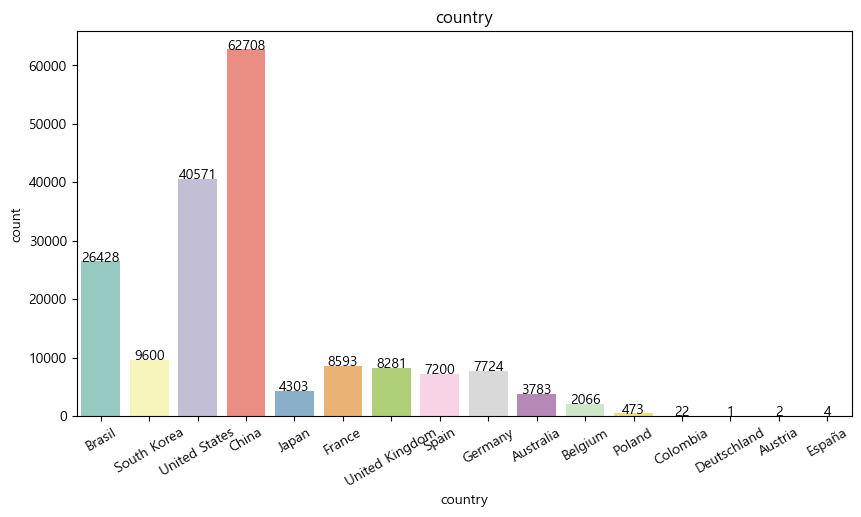

In [127]:
visualize_count('country')

C:\Users\LG\AppData\Local\Temp\ipykernel_9472\3324385081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=looker_ecom, palette='Set3', ax=ax)
C:\Users\LG\AppData\Local\Temp\ipykernel_9472\3324385081.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


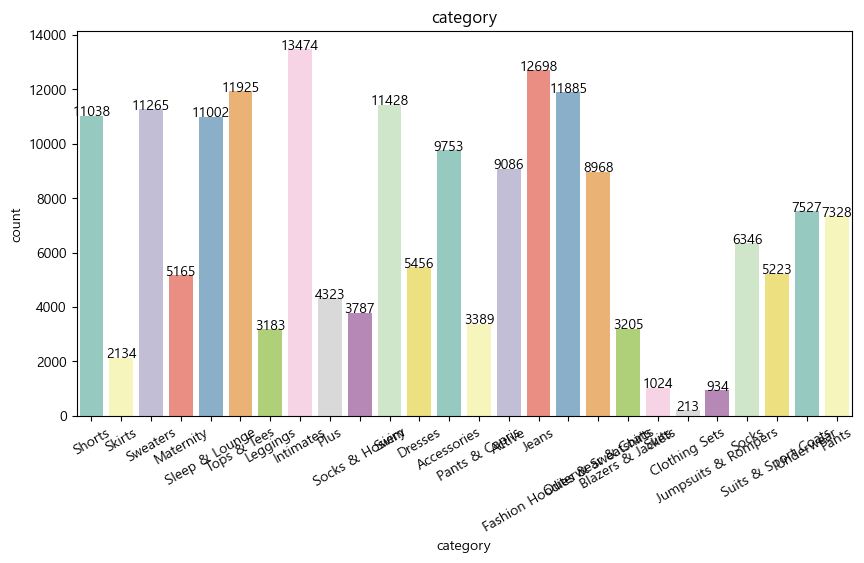

,count
Shorts,11038
Skirts,2134
Sweaters,11265
Maternity,5165
Sleep & Lounge,11002
Tops & Tees,11925
Leggings,3183
Intimates,13474
Plus,4323
Socks & Hosiery,3787


In [131]:
visualize_count('category')

#### (3) 지역 별 제품 카테고리

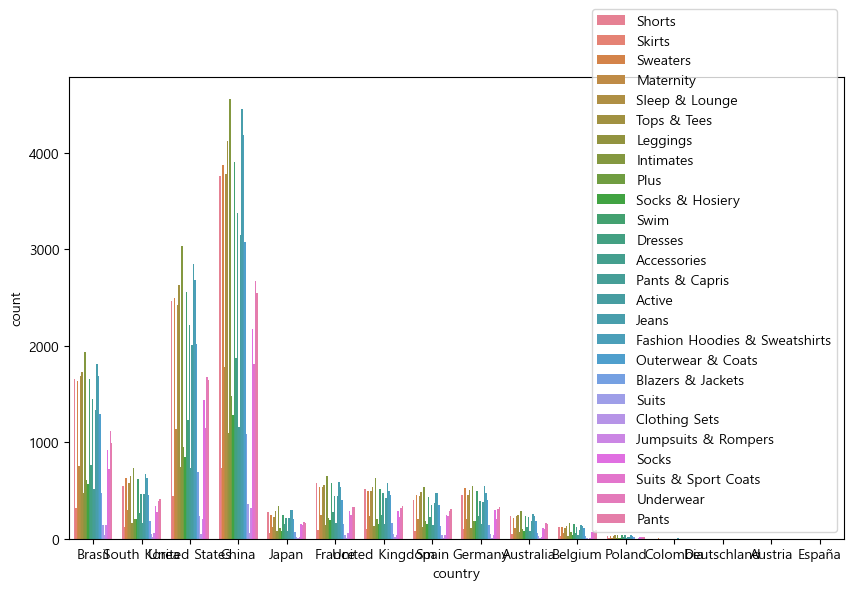

Brasil
category
Intimates                        1940
Jeans                            1812
Tops & Tees                      1728
Fashion Hoodies & Sweatshirts    1692
Sleep & Lounge                   1689
Shorts                           1657
Swim                             1656
Sweaters                         1640
Accessories                      1444
Active                           1332
Outerwear & Coats                1290
Underwear                        1115
Pants                             992
Socks                             921
Dresses                           761
Maternity                         752
Suits & Sport Coats               726
Plus                              604
Socks & Hosiery                   571
Pants & Capris                    520
Blazers & Jackets                 471
Leggings                          470
Skirts                            323
Suits                             145
Jumpsuits & Rompers               141
Clothing Sets                     

In [132]:
# 시각화
plt.figure(figsize=(10,6))
sns.countplot(data=looker_ecom, x='country', hue='category')     
plt.legend(loc='best')
plt.show()

# 수치
def cate_value_counts(region):
    for uniq in list(looker_ecom[region].unique()):
        cond_unique = (looker_ecom[region]==uniq)
        print(uniq)
        print(looker_ecom.loc[cond_unique]['category'].value_counts())
        print()

cate_value_counts('country')

## 4. 연관분석(장바구니 분석)

### 4-1) 지역(country, city, state)

- 일단 city로 보기

In [70]:
display(looker_ecom['country'].unique())
display(looker_ecom['city'].unique())
display(looker_ecom['state'].unique())

array(['Brasil', 'South Korea', 'United States', 'China', 'Japan',
       'France', 'United Kingdom', 'Spain', 'Germany', 'Australia',
       'Belgium', 'Poland', 'Colombia', 'Deutschland', 'Austria',
       'España'], dtype=object)

array(['União', 'Cheongju City', 'New York', ..., 'Floresville',
       'Campredó', 'Elsdorf'], dtype=object)

array(['Piauí', 'Chung-cheong bukdo', 'New York',
       'Ningxia Hui Autonomous Region', 'Chiba', 'Île-de-France',
       'Xinjiang Uygur Autonomous Region', 'Seoul', 'England', 'Shanghai',
       'Florida', 'Hunan', 'Guangxi Zhuang Autonomous Region',
       'New Jersey', 'Tokyo', 'Tennessee', 'Shandong', 'Amazonas',
       'Virginia', 'Bahia', 'Maine', 'Henan', 'Comunidad Valenciana',
       'Nordrhein-Westfalen', 'Jilin', 'Sichuan', 'Rio Grande do Norte',
       'Hauts-de-France', 'North Carolina', 'Texas', 'Beijing', 'Nevada',
       'Pennsylvania', 'São Paulo', 'Heilongjiang', 'Guizhou', 'Pará',
       'Pernambuco', 'Comunidad de Madrid', 'Gyeonggi-do', 'California',
       'Zhejiang', 'Michigan', "Provence-Alpes-Côte d'Azur", 'Minnesota',
       'Región de Murcia', 'Andalucía', 'Ceará',
       'Daegu Metropolitan City', 'New South Wales',
       'Principado de Asturias', 'Flanders', 'Guangdong',
       'Rio de Janeiro', 'Jiangsu', 'Pays de la Loire', 'Bretagne',
       'Maranhão

In [78]:
looker_ecom['city'].unique()[:10]

array(['União', 'Cheongju City', 'New York', 'Shenzhen',
       'City of the city', 'Vigneux-sur-Seine', 'Shaoxing', 'Seoul',
       'Portsmouth', 'Guiyang'], dtype=object)

### 4-2) 상품(category, name, brand)
- 일단 category로 보기

In [71]:
display(looker_ecom['category'].unique())
display(looker_ecom['name'].unique())
display(looker_ecom['brand'].unique())

array(['Shorts', 'Skirts', 'Sweaters', 'Maternity', 'Sleep & Lounge',
       'Tops & Tees', 'Leggings', 'Intimates', 'Plus', 'Socks & Hosiery',
       'Swim', 'Dresses', 'Accessories', 'Pants & Capris', 'Active',
       'Jeans', 'Fashion Hoodies & Sweatshirts', 'Outerwear & Coats',
       'Blazers & Jackets', 'Suits', 'Clothing Sets',
       'Jumpsuits & Rompers', 'Socks', 'Suits & Sport Coats', 'Underwear',
       'Pants'], dtype=object)

array(['Grane Supergirl Shorts',
       'Woman Within Plus Size Petite flare skirt',
       'LookbookStore Women Coloured Zip Mouth Smile Shoulder 3D Ear Cat Front Jumper Sheatshirt Top',
       ..., 'The North Face Freedom Mens Ski Pants 2013',
       "Black Terry 'Y' Suspenders",
       "Royal Robbins Men's Billy Goat Utility Shorts"], dtype=object)

array(['Grane', 'Woman Within', 'LookbookStore', ..., 'Alpine Swiss',
       'james', 'JSLV'], dtype=object)

In [75]:
looker_ecom['category'].unique()

array(['Shorts', 'Skirts', 'Sweaters', 'Maternity', 'Sleep & Lounge',
       'Tops & Tees', 'Leggings', 'Intimates', 'Plus', 'Socks & Hosiery',
       'Swim', 'Dresses', 'Accessories', 'Pants & Capris', 'Active',
       'Jeans', 'Fashion Hoodies & Sweatshirts', 'Outerwear & Coats',
       'Blazers & Jackets', 'Suits', 'Clothing Sets',
       'Jumpsuits & Rompers', 'Socks', 'Suits & Sport Coats', 'Underwear',
       'Pants'], dtype=object)

### 4-3) 연관분석(장바구니 분석)

#### (1) TEST

In [73]:
# New York에서 주문한 제품카테고리 목록
result = looker_ecom[looker_ecom['city']== 'New York'].groupby('user_id')['category'].unique().reset_index()['category']
result

0                                 [Sleep & Lounge, Swim]
1                    [Leggings, Swim, Outerwear & Coats]
2            [Intimates, Sweaters, Sleep & Lounge, Plus]
3          [Shorts, Tops & Tees, Accessories, Underwear]
4                                                [Socks]
                             ...                        
674                                               [Swim]
675                                             [Shorts]
676    [Accessories, Intimates, Fashion Hoodies & Swe...
677                                          [Intimates]
678                                               [Swim]
Name: category, Length: 679, dtype: object

In [105]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(result).transform(result)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Accessories,Active,Blazers & Jackets,Clothing Sets,Dresses,Fashion Hoodies & Sweatshirts,Intimates,Jeans,Jumpsuits & Rompers,Leggings,Maternity,Outerwear & Coats,Pants,Pants & Capris,Plus,Shorts,Skirts,Sleep & Lounge,Socks,Socks & Hosiery,Suits,Suits & Sport Coats,Sweaters,Swim,Tops & Tees,Underwear
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
676,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
677,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

,support,itemsets
4,0.153166,(Intimates)
14,0.144330,(Tops & Tees)
3,0.138439,(Fashion Hoodies & Sweatshirts)
8,0.134021,(Shorts)
5,0.131075,(Jeans)
13,0.131075,(Swim)
12,0.128130,(Sweaters)
0,0.126657,(Accessories)
1,0.126657,(Active)
9,0.120766,(Sleep & Lounge)


#### (2) 연관분석 함수

In [115]:
def basket_analysis(city, min_sup):
    result = looker_ecom[looker_ecom['city']== city].groupby('user_id')['category'].unique().reset_index()['category']
    
    import pandas as pd
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori, association_rules

    te = TransactionEncoder()
    # fit()으로 result가 고유한 라벨을 가지게 됨
    # transform()으로 파이썬 리스트를 one-hot 인코딩된 numpy 배열로 변환함
    te_ary = te.fit(result).transform(result)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Apriori 알고리즘
    # 지지도가 0.8 이상인 것들을 알아낼 수 있음
    frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    
    # association_rules()로 지지도가 0.5가 넘는 항목에 대한 향상도가 양의 상관관계에 있는 것이 무엇인지 알아볼 수 있음
    asso_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by='support', ascending=False)
    
    return display(frequent_itemsets), display(asso_rules)

#### (3) city 별 지지도, 향상도 확인

In [118]:
# for문으로 city별 지지도, 향상도 확인하기
city_list = ['União', 'Cheongju City', 'New York', 'Shenzhen',
            'City of the city', 'Vigneux-sur-Seine', 'Shaoxing', 'Seoul',
            'Portsmouth', 'Guiyang']

for city in city_list:
    print(f'{city}')
    basket_analysis(city, 0.1)

União


,support,itemsets
2,0.500,(Jeans)
9,0.375,(Sweaters)
14,0.250,"(Jeans, Sweaters)"
0,0.125,(Active)
13,0.125,"(Jeans, Pants)"
22,0.125,"(Jeans, Sweaters, Swim)"
21,0.125,"(Fashion Hoodies & Sweatshirts, Suits & Sport ..."
20,0.125,"(Sweaters, Swim)"
19,0.125,"(Skirts, Sweaters)"
18,0.125,"(Sweaters, Shorts)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Jeans),(Sweaters),0.500,0.375,0.250,0.500000,1.333333,0.062500,1.250000,0.500000
1,(Sweaters),(Jeans),0.375,0.500,0.250,0.666667,1.333333,0.062500,1.500000,0.400000
28,(Fashion Hoodies & Sweatshirts),(Suits & Sport Coats),0.125,0.125,0.125,1.000000,8.000000,0.109375,inf,1.000000
21,(Shorts),(Sweaters),0.125,0.375,0.125,1.000000,2.666667,0.078125,inf,0.714286
22,(Skirts),(Shorts),0.125,0.125,0.125,1.000000,8.000000,0.109375,inf,1.000000
23,(Shorts),(Skirts),0.125,0.125,0.125,1.000000,8.000000,0.109375,inf,1.000000
24,(Suits & Sport Coats),(Outerwear & Coats),0.125,0.125,0.125,1.000000,8.000000,0.109375,inf,1.000000
25,(Outerwear & Coats),(Suits & Sport Coats),0.125,0.125,0.125,1.000000,8.000000,0.109375,inf,1.000000
26,(Jeans),(Swim),0.500,0.125,0.125,0.250000,2.000000,0.062500,1.166667,1.000000
27,(Swim),(Jeans),0.125,0.500,0.125,1.000000,2.000000,0.062500,inf,0.571429


Cheongju City


,support,itemsets
11,0.18,(Tops & Tees)
2,0.16,(Intimates)
7,0.16,(Shorts)
10,0.16,(Sweaters)
3,0.14,(Jeans)
0,0.12,(Accessories)
1,0.12,(Active)
8,0.12,(Sleep & Lounge)
4,0.10,(Maternity)
5,0.10,(Outerwear & Coats)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


New York


,support,itemsets
3,0.153166,(Intimates)
9,0.144330,(Tops & Tees)
2,0.138439,(Fashion Hoodies & Sweatshirts)
5,0.134021,(Shorts)
4,0.131075,(Jeans)
8,0.131075,(Swim)
7,0.128130,(Sweaters)
0,0.126657,(Accessories)
1,0.126657,(Active)
6,0.120766,(Sleep & Lounge)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Shenzhen


,support,itemsets
4,0.153271,(Jeans)
6,0.144860,(Sleep & Lounge)
7,0.139252,(Sweaters)
2,0.138318,(Fashion Hoodies & Sweatshirts)
9,0.137383,(Tops & Tees)
3,0.128037,(Intimates)
8,0.126168,(Swim)
0,0.124299,(Accessories)
5,0.120561,(Shorts)
1,0.100000,(Active)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


City of the city


,support,itemsets
2,0.4,(Intimates)
10,0.2,(Shorts)
3,0.2,(Jeans)
4,0.2,(Leggings)
6,0.2,(Outerwear & Coats)
...,...,...
30,0.1,"(Pants & Capris, Leggings)"
31,0.1,"(Plus, Leggings)"
1,0.1,(Fashion Hoodies & Sweatshirts)
33,0.1,"(Pants & Capris, Maternity)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Pants & Capris, Dresses)",(Leggings),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
164,"(Jeans, Outerwear & Coats, Shorts)",(Sleep & Lounge),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
166,"(Sleep & Lounge, Outerwear & Coats)","(Jeans, Shorts)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
167,"(Jeans, Outerwear & Coats)","(Sleep & Lounge, Shorts)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
168,"(Shorts, Outerwear & Coats)","(Sleep & Lounge, Jeans)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
92,(Sweaters),"(Pants & Capris, Leggings)",0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
93,(Leggings),"(Pants & Capris, Sweaters)",0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
94,"(Pants & Capris, Maternity)",(Sweaters),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
95,"(Pants & Capris, Sweaters)",(Maternity),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000


Vigneux-sur-Seine


,support,itemsets
0,0.2,(Accessories)
10,0.2,"(Socks, Accessories)"
17,0.2,"(Socks, Sleep & Lounge, Outerwear & Coats)"
16,0.2,"(Socks, Sleep & Lounge, Accessories)"
15,0.2,"(Socks, Accessories, Outerwear & Coats)"
14,0.2,"(Sleep & Lounge, Accessories, Outerwear & Coats)"
13,0.2,"(Socks, Sleep & Lounge)"
12,0.2,"(Socks, Outerwear & Coats)"
11,0.2,"(Sleep & Lounge, Outerwear & Coats)"
9,0.2,"(Sleep & Lounge, Accessories)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Socks),(Accessories),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
37,"(Socks, Sleep & Lounge, Outerwear & Coats)",(Accessories),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
27,(Sleep & Lounge),(Socks),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
28,(Socks),(Outerwear & Coats),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
29,(Outerwear & Coats),(Socks),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
30,(Sleep & Lounge),(Outerwear & Coats),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
31,(Outerwear & Coats),(Sleep & Lounge),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
32,(Sleep & Lounge),(Accessories),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
33,(Accessories),(Sleep & Lounge),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0
34,(Accessories),(Outerwear & Coats),0.2,0.2,0.2,1.0,5.0,0.16,inf,1.0


Shaoxing


,support,itemsets
6,0.212389,(Tops & Tees)
2,0.168142,(Jeans)
1,0.150442,(Fashion Hoodies & Sweatshirts)
5,0.141593,(Sweaters)
3,0.132743,(Sleep & Lounge)
0,0.123894,(Accessories)
4,0.123894,(Socks)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Seoul


,support,itemsets
4,0.152570,(Jeans)
8,0.143449,(Sweaters)
3,0.141791,(Intimates)
7,0.136816,(Sleep & Lounge)
10,0.129353,(Tops & Tees)
9,0.127695,(Swim)
1,0.125207,(Active)
5,0.121061,(Outerwear & Coats)
2,0.120232,(Fashion Hoodies & Sweatshirts)
6,0.116915,(Shorts)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


Portsmouth


,support,itemsets
0,0.357143,(Accessories)
3,0.285714,(Intimates)
2,0.214286,(Dresses)
7,0.214286,(Shorts)
1,0.142857,(Active)
4,0.142857,(Jeans)
5,0.142857,(Pants & Capris)
6,0.142857,(Plus)
8,0.142857,(Sweaters)
9,0.142857,(Swim)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Intimates),(Swim),0.285714,0.142857,0.142857,0.5,3.5,0.102041,1.714286,1.000000
1,(Swim),(Intimates),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf,0.833333


Guiyang


,support,itemsets
2,0.162037,(Intimates)
8,0.157407,(Tops & Tees)
3,0.152778,(Jeans)
5,0.152778,(Sleep & Lounge)
6,0.129630,(Sweaters)
1,0.125000,(Fashion Hoodies & Sweatshirts)
7,0.125000,(Swim)
0,0.120370,(Accessories)
4,0.120370,(Shorts)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
